Source: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

| Variable Name                  | Role    | Type        | Demographic | Description                                                                                                     | Units | Missing Values |
| ------------------------------ | ------- | ----------- | ----------- | --------------------------------------------------------------------------------------------------------------- | ----- | -------------- |
| Gender                         | Feature | Categorical | Gender      |                                                                                                                 |       | no             |
| Age                            | Feature | Continuous  | Age         |                                                                                                                 |       | no             |
| Height                         | Feature | Continuous  |             |                                                                                                                 |       | no             |
| Weight                         | Feature | Continuous  |             |                                                                                                                 |       | no             |
| family_history_with_overweight | Feature | Binary      |             | Has a family member suffered or suffers from overweight?                                                        |       | no             |
| FAVC                           | Feature | Binary      |             | Do you eat high caloric food frequently?                                                                        |       | no             |
| FCVC                           | Feature | Integer     |             | Do you usually eat vegetables in your meals?                                                                    |       | no             |
| NCP                            | Feature | Continuous  |             | How many main meals do you have daily?                                                                          |       | no             |
| CAEC                           | Feature | Categorical |             | Do you eat any food between meals?                                                                              |       | no             |
| SMOKE                          | Feature | Binary      |             | Do you smoke?                                                                                                   |       | no             |
| CH2O                           | Feature | Continuous  |             | How much water do you drink daily?                                                                              |       | no             |
| SCC                            | Feature | Binary      |             | Do you monitor the calories you eat daily?                                                                      |       | no             |
| FAF                            | Feature | Continuous  |             | How often do you have physical activity?                                                                        |       | no             |
| TUE                            | Feature | Integer     |             | How much time do you use technological devices such as cell phone, videogames, television, computer and others? |       | no             |
| CALC                           | Feature | Categorical |             | How often do you drink alcohol?                                                                                 |       | no             |
| MTRANS                         | Feature | Categorical |             | Which transportation do you usually use?                                                                        |       | no             |
| NObeyesdad                     | Target  | Categorical |             | Obesity level                                    

# Import libraries and read data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [ ]:
df=pd.read_csv('../data/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip')
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

# Data analysis

First we round some variables that should be integers, but they have been calculated as the mean of their habits.

In [69]:
df.NCP=df.NCP.round()
df.FAF=df.FAF.round()
df.TUE=df.TUE.round()

Then we simplify some variable names and the names of the categories of the target variable, in order to make the data analysis and visualisation easier.

In [25]:
df.rename(columns={'family_history_with_overweight':'FHO'},inplace=True)

In [49]:
mapping = {'Normal_Weight':'NW', 'Overweight_Level_I':'OW1', 'Overweight_Level_II':'OW2',
       'Obesity_Type_I':'O1', 'Insufficient_Weight':'IW', 'Obesity_Type_II':'O2',
       'Obesity_Type_III':'O3'
}

In [51]:
df.replace({'NObeyesdad':mapping},inplace=True)

In [4]:
df.FCVC

0       2.0
1       3.0
2       2.0
3       3.0
4       2.0
       ... 
2106    3.0
2107    3.0
2108    3.0
2109    3.0
2110    3.0
Name: FCVC, Length: 2111, dtype: float64

Now we encode the categorical variables. OrdinalEncoder is for converting features, while LabelEncoder is for converting target variable.

In [22]:
df_ct=df[['Gender','SMOKE','FHO',
                          'FAVC','CAEC','SCC',
                          'CALC','MTRANS']]
Y = df['NObeyesdad']
df_categorized = df.copy()

In [26]:
oe= OrdinalEncoder()
df_categorized[['Gender','SMOKE','FHO','FAVC','CAEC','SCC',
                          'CALC','MTRANS']] = oe.fit_transform(df_ct)
le = LabelEncoder()
df_categorized['NObeyesdad'] = le.fit_transform(Y)

In [68]:
df_categorized

Gender        Age    Height      Weight  FHO  FAVC  FCVC  NCP  CAEC  \
0        0.0  21.000000  1.620000   64.000000  1.0   0.0   2.0  3.0   2.0   
1        0.0  21.000000  1.520000   56.000000  1.0   0.0   3.0  3.0   2.0   
2        1.0  23.000000  1.800000   77.000000  1.0   0.0   2.0  3.0   2.0   
3        1.0  27.000000  1.800000   87.000000  0.0   0.0   3.0  3.0   2.0   
4        1.0  22.000000  1.780000   89.800000  0.0   0.0   2.0  1.0   2.0   
...      ...        ...       ...         ...  ...   ...   ...  ...   ...   
2106     0.0  20.976842  1.710730  131.408528  1.0   1.0   3.0  3.0   2.0   
2107     0.0  21.982942  1.748584  133.742943  1.0   1.0   3.0  3.0   2.0   
2108     0.0  22.524036  1.752206  133.689352  1.0   1.0   3.0  3.0   2.0   
2109     0.0  24.361936  1.739450  133.346641  1.0   1.0   3.0  3.0   2.0   
2110     0.0  23.664709  1.738836  133.472641  1.0   1.0   3.0  3.0   2.0   

      SMOKE      CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0       0.0  2.000000  0.0  0.0  1.0   3.0     3.0           1  
1       1.0  3.000000  1.0  3.0  0.0   2.0     3.0           1  
2       0.0  2.000000  0.0  2.0  1.0   1.0     3.0           1  
3       0.0  2.000000  0.0  2.0  0.0   1.0     4.0           5  
4       0.0  2.000000  0.0  0.0  0.0   2.0     3.0           6  
...     ...       ...  ...  ...  ...   ...     ...         ...  
2106    0.0  1.728139  0.0  2.0  1.0   2.0     3.0           4  
2107    0.0  2.005130  0.0  1.0  1.0   2.0     3.0           4  
2108    0.0  2.054193  0.0  1.0  1.0   2.0     3.0           4  
2109    0.0  2.852339  0.0  1.0  1.0   2.0     3.0           4  
2110    0.0  2.863513  0.0  1.0  1.0   2.0     3.0           4  

[2111 rows x 17 columns]

Let's calculate the correlation between the different variables.

In [29]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_categorized.corr(),annot=True, cmap="YlGnBu",
            vmin=-1,vmax=1,fmt=".2f", linewidth=.5);

Now let's analyze the data using different data visualisation technicques, like histograms.

In [30]:
df_categorized.hist(figsize=(16,14)); #";"" to hide array([...])

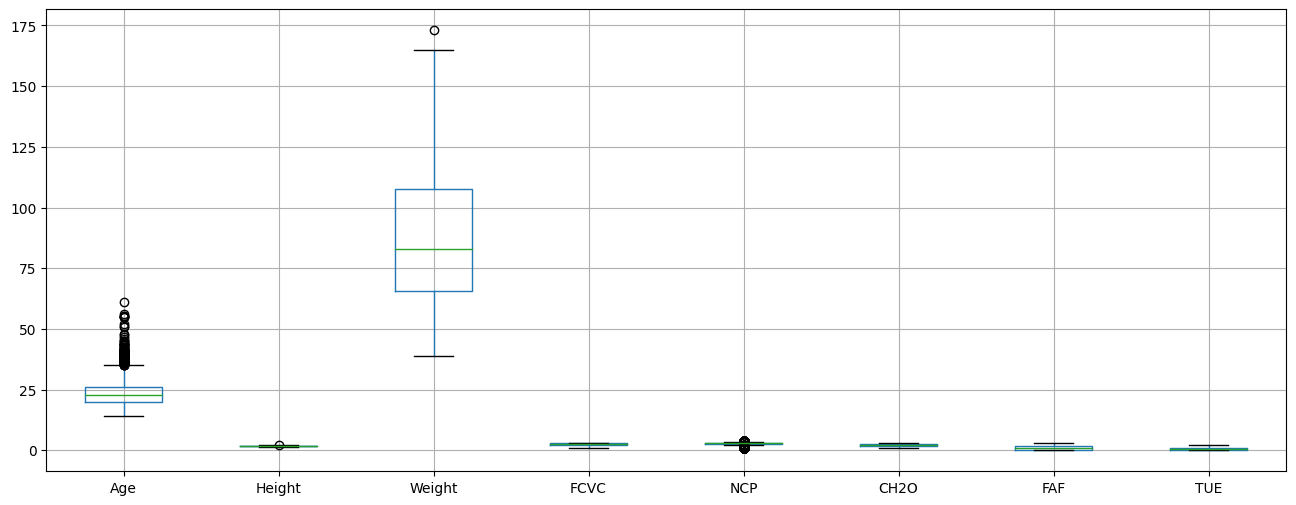

In [52]:
df.boxplot(figsize=(16,6));

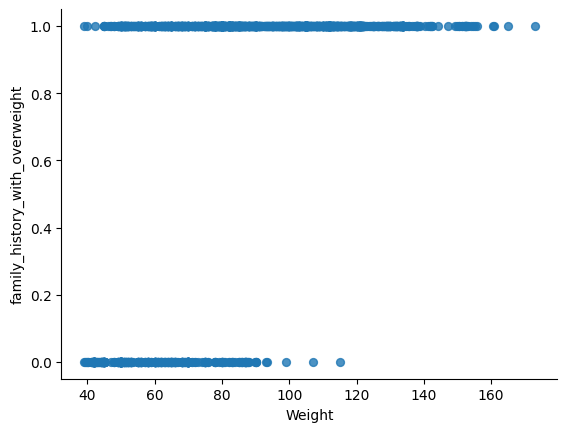

In [ ]:

df_categorized.plot(kind='scatter', x='Weight', y='family_history_with_overweight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [53]:
g = sns.FacetGrid(df, col='MTRANS')
g.map(plt.hist, 'Age', bins=20);

In [56]:
g = sns.FacetGrid(df.loc[df_categorized['MTRANS'].isin([0,2,3])], col='MTRANS')
g.map(plt.hist, 'NObeyesdad', bins=7);

In [61]:
g = sns.FacetGrid(df.loc[df_categorized['MTRANS'].isin([1,4])], col='MTRANS')
g.map(plt.hist, 'NObeyesdad', bins=7);

In [59]:
g = sns.FacetGrid(df, col='SCC')
g.map(plt.hist, 'NObeyesdad', bins=7);

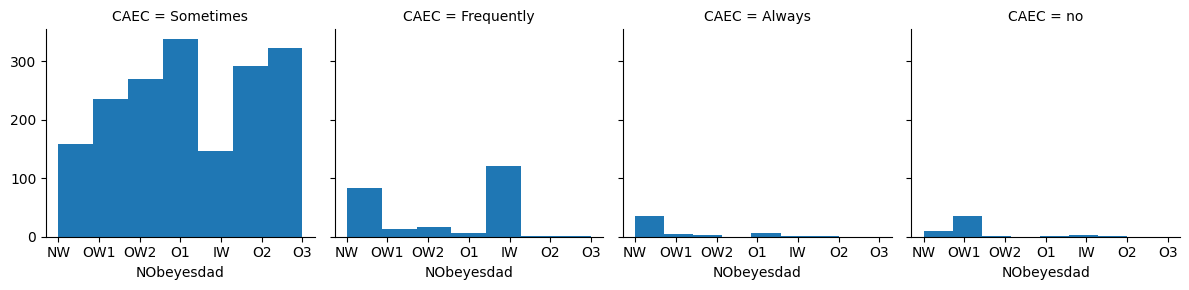

In [62]:

g = sns.FacetGrid(df, col='CAEC')
g.map(plt.hist, 'NObeyesdad', bins=7);

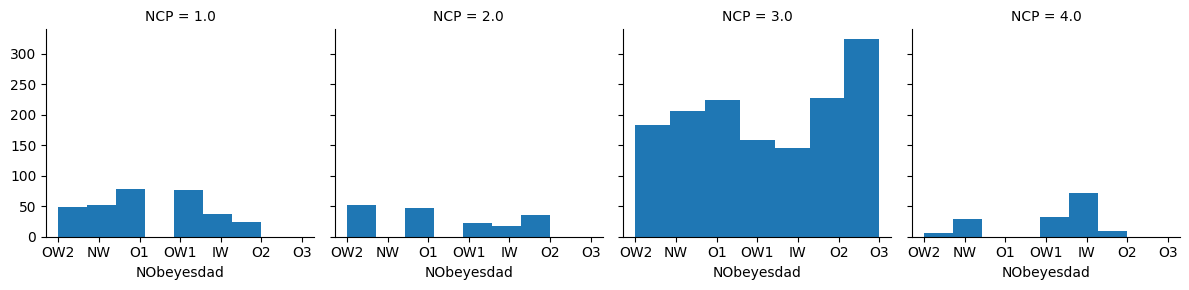

In [72]:
g = sns.FacetGrid(df, col='NCP')
g.map(plt.hist, 'NObeyesdad', bins=7);

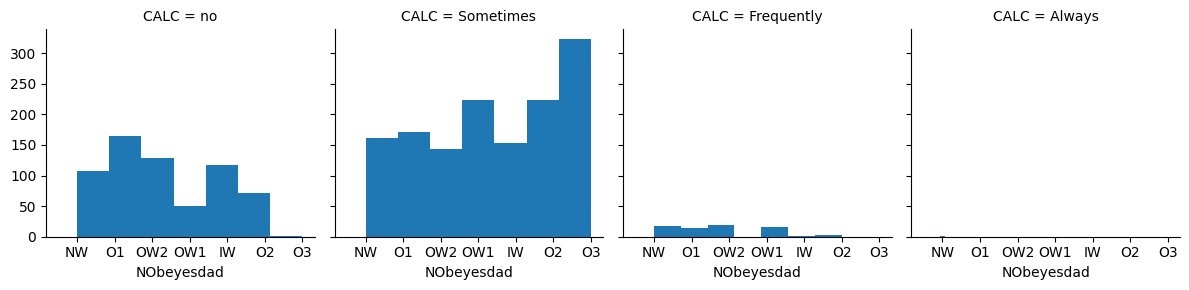

In [65]:

g = sns.FacetGrid(df, col='CALC')
g.map(plt.hist, 'NObeyesdad', bins=7);

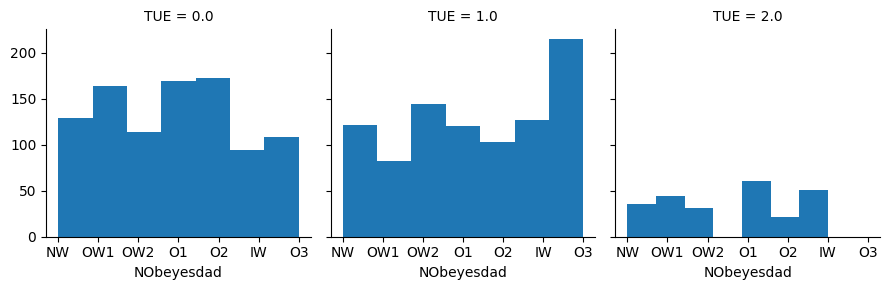

In [70]:
g = sns.FacetGrid(df, col='TUE')
g.map(plt.hist, 'NObeyesdad', bins=7);

In [71]:
g = sns.FacetGrid(df, col='FHO')
g.map(plt.hist, 'NObeyesdad', bins=7);

## Modelling

Now let's try some different classic classification models. We are going to try them using different model parameters throught the GridSearch technicque, which tests each model with the asked parameters

In [154]:
from sklearn.linear_model import LogisticRegression,Perceptron,RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [88]:
train_len = round(len(df)*0.8)

In [214]:
features_columns=df_categorized.columns[~df_categorized.columns.isin(['NObeyesdad','Height','Weight'])]
X,Y = df_categorized[features_columns],df_categorized['NObeyesdad']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2, random_state=2)

In [215]:
from sklearn.model_selection import GridSearchCV
parameters = {'solver':('lbfgs', 'liblinear', 'newton-cholesky', 'sag', 'saga'), 'C':[0.1,0.5,1,10],'max_iter':[2000]}
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters)

In [216]:
models = [clf,          Perceptron(),RidgeClassifier(), SGDClassifier(),RandomForestClassifier()]
accuracy = []
for model in models:
  model.fit(X_train, Y_train);
  pred=model.predict(X_test)
  accuracy.append(accuracy_score(Y_test,pred))
accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.6052009456264775,
 0.3664302600472813,
 0.5673758865248227,
 0.5390070921985816,
 0.8486997635933806]

The best model is the random forest. Let's try it now only with the most correlated variables.

In [157]:
com=pd.DataFrame(Y_test)
com['pred']=pred

In [158]:
com

NObeyesdad  pred
1523           3     3
1997           4     4
460            1     1
137            2     6
1092           6     6
...          ...   ...
454            1     1
288            1     1
1218           2     2
768            5     5
1330           2     2

[423 rows x 2 columns]

In [160]:
df_pre=df_categorized.corr().NObeyesdad.apply(np.fabs).sort_values(ascending=False)
df_pr=df_pre[df_pre>0.1]
df_prep=df_categorized[df_pr.index.values]

In [161]:
features_columns=df_prep.columns[~df_prep.columns.isin(['NObeyesdad'])]
X,Y = df_prep[features_columns.values],df_prep['NObeyesdad']
X_train,X_test,Y_train,Y_test = X[:train_len],X[train_len:],Y[:train_len],Y[train_len:]

In [164]:
models = [LogisticRegression(),Perceptron(),RidgeClassifier(), SGDClassifier(),RandomForestClassifier()]
accuracy = []
for model in models:
  print(model)
  model.fit(X_train, Y_train)
  pred=model.predict(X_test)
  accuracy.append(accuracy_score(Y_test,pred))
accuracy

LogisticRegression()
Perceptron()
RidgeClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SGDClassifier()
RandomForestClassifier()


[0.36729857819905215,
 0.0,
 0.16824644549763032,
 0.0971563981042654,
 0.6872037914691943]

In [163]:
accuracy

[0.36729857819905215,
 0.0,
 0.16824644549763032,
 0.26066350710900477,
 0.6611374407582938]

We can check that the accuracy is lower with only the most correlated variables, so let's preserve the old variables.

It's evident that if we know the height and the weight of a person, we know through the BMI if someone is obese or not. So, let's discard them and try the models again. We are using again the Random Forest, but this time we are trying it with a GridSearch to find the best parameters.

In [217]:
features_columns=df_categorized.columns[~df_categorized.columns.isin(['NObeyesdad','Height','Weight'])]
X,Y = df_categorized[features_columns],df_categorized['NObeyesdad']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.1, random_state=2)

In [218]:
parameters = {'max_depth':[None,2,4,6],'n_estimators':[100,500,1000]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters,cv=3,return_train_score=True)

In [219]:
clf.fit(X_train,Y_train)
pred=clf.predict(X_test)
print(accuracy_score(Y_test,pred))

0.8867924528301887


In [220]:
print(clf.best_score_)
print(clf.best_params_)

0.8193786203264876
{'max_depth': None, 'n_estimators': 1000}


Thus, we can conclude that we can predict with certain accuracy with the variables that we have if someone can have overweight or not using the features that the dataset has provided to us.